In [1]:
import pandas as pd
import numpy as np
from datetime import *
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
sns.set()
from matplotlib.pylab import rcParams

In [2]:
tabelao = pd.read_csv("TABELAO_FINAL.csv")
tabelao.DATA_NASCIMENTO = pd.to_datetime(tabelao.DATA_NASCIMENTO)

In [3]:
# idade = tabelao['DATA_NASCIMENTO'].apply(lambda x: (datetime.now().year - x.year))
# tabelao.insert(loc=2, column='IDADE', value=idade.fillna(0).astype(int))
# tabelao.to_csv('TABELAO_FINAL.csv',index=False)

In [4]:
tabelao.head(20)

,CODIGO_CLIENTE,DATA_NASCIMENTO,IDADE,SEXO,ESTADO_CIVIL,CIDADE,UF,BAIRRO,CEP,QTD_DEPENDENTES,...,DATA_ADMISSAO,CATEGORIAL_PROFISSAO,TIPO_RESIDENCIA,RENDA_TITULAR,RENDA_CJ,OUTRAS_RENDAS,QTD_CARTOES_ADICIONAIS,FLAG_CONTA_BANCO,VALOR_HISTORICO_COMPRAS,CLASS
0,875,1974-03-03,45,F,SO,SANTO CRISTO,RS,PHILIPPSEN,98960000.0,0.0,...,2003/02/10 00:00:00.000000000,AUT+NOMO,PR,1000.00,NaN,NaN,0,NaN,1225.73,1
1,1689,1978-02-20,41,M,SO,TOLEDO,PR,JARDIM COOPAGRO,85903370.0,0.0,...,NaN,APOSENTADO,AL,1152.00,NaN,NaN,0,NaN,1045.04,1
2,5140,1956-10-16,63,M,SO,SANTA ROSA,RS,CRUZEIRO,98900000.0,0.0,...,NaN,APOSENTADO,PR,1900.00,NaN,NaN,0,NaN,3280.56,1
3,7376,1961-01-22,58,M,SE,SANTA ROSA,RS,AUXILIADORA,98796524.0,0.0,...,1992/12/07 00:00:00.000000000,ASSALARIADO,PR,2182.00,NaN,NaN,0,S,1337.71,1
4,9042,1968-08-22,51,F,CA,SANTA ROSA,RS,CENTRAL,98787404.0,0.0,...,2004/07/16 00:00:00.000000000,ASSALARIADO,PR,3335.00,1800.0,NaN,0,NaN,5987.88,1
5,9659,1959-11-30,60,M,CA,SANTA ROSA,RS,CENTRO,98900000.0,0.0,...,NaN,APOSENTADO,PR,2242.00,1000.0,1000.0,0,S,1345.55,0
6,9945,1963-08-01,56,F,SE,SANTA ROSA,RS,TIMBAUVA,98781052.0,2.0,...,2014/05/02 00:00:00.000000000,ASSALARIADO,PR,5900.00,NaN,NaN,0,NaN,5929.81,1
7,10161,1960-06-07,59,M,CA,SANTA ROSA,RS,CENTRAL,98787518.0,0.0,...,NaN,APOSENTADO,PR,1100.00,NaN,NaN,0,NaN,6724.50,1
8,10992,1978-02-09,41,M,CA,SANTA ROSA,RS,CRUZEIRO,98900000.0,0.0,...,2001/02/01 00:00:00.000000000,AUT+NOMO,PR,3600.00,0.0,NaN,0,NaN,2570.25,1
9,12400,1949-05-14,70,M,SE,SANTA ROSA,RS,CENTRAL,98787396.0,0.0,...,1990/01/01 00:00:00.000000000,APOSENTADO,PR,2400.00,NaN,1.0,0,NaN,4664.40,1


In [5]:
tabelao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96390 entries, 0 to 96389
Data columns (total 21 columns):
CODIGO_CLIENTE             96390 non-null int64
DATA_NASCIMENTO            96387 non-null datetime64[ns]
IDADE                      96390 non-null int64
SEXO                       96389 non-null object
ESTADO_CIVIL               96389 non-null object
CIDADE                     96390 non-null object
UF                         96390 non-null object
BAIRRO                     96390 non-null object
CEP                        96390 non-null float64
QTD_DEPENDENTES            96389 non-null float64
DATA_CADASTRO              96390 non-null object
DATA_ADMISSAO              52040 non-null object
CATEGORIAL_PROFISSAO       94674 non-null object
TIPO_RESIDENCIA            95438 non-null object
RENDA_TITULAR              96384 non-null float64
RENDA_CJ                   4393 non-null float64
OUTRAS_RENDAS              11067 non-null float64
QTD_CARTOES_ADICIONAIS     96390 non-null int64


In [6]:
good = tabelao[tabelao.CLASS == 0]
bad = tabelao[tabelao.CLASS == 1]

## Idade

Faixa de idade:

In [7]:
a = good.groupby('IDADE').size()

In [8]:
good_age = [a[(a.index > 0) & (a.index <= 25)].sum(), 
        a[(a.index > 25) & (a.index <= 35)].sum(), 
        a[(a.index > 35) & (a.index <= 45)].sum(),
        a[(a.index > 45) & (a.index <= 55)].sum(),
        a[(a.index > 55) & (a.index <= 65)].sum(),
        a[(a.index > 65)].sum()]
good_age = np.array(good_age)

In [9]:
b = bad.groupby('IDADE').size()

In [10]:
bad_age = [b[(b.index > 0) & (b.index <= 25)].sum(), 
        b[(b.index > 25) & (b.index <= 35)].sum(), 
        b[(b.index > 35) & (b.index <= 45)].sum(),
        b[(b.index > 45) & (b.index <= 55)].sum(),
        b[(b.index > 55) & (b.index <= 65)].sum(),
        b[(b.index > 65)].sum()]
bad_age = np.array(bad_age)

Gráfico:

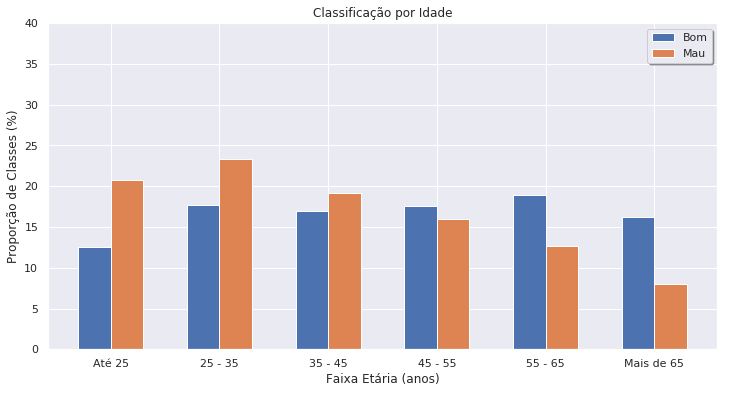

In [11]:
rcParams['figure.figsize'] = 12, 6
# set width of bar
barWidth = 0.3
x = ['Até 25', '25 - 35', '35 - 45', '45 - 55', '55 - 65', 'Mais de 65']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(good_age))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, 100*good_age/good_age.sum(), width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, 100*bad_age/bad_age.sum(), width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Faixa Etária (anos)')
pylab.ylabel('Proporção de Classes (%)')
pylab.ylim((0, 40))
plt.title('Classificação por Idade')
plt.xticks(x_pos, x)
 
# Create legend & Show graphic
plt.legend(frameon=True, shadow=True)
plt.show()

## Sexo

In [12]:
print('Mulher: %f' %(tabelao.SEXO.value_counts()[0]/len(tabelao.SEXO)),
      '\nHomem: %f' %(tabelao.SEXO.value_counts()[1]/len(tabelao.SEXO)))
tabelao.SEXO.value_counts()

Mulher: 0.516776 
Homem: 0.483214


F    49812
M    46577
Name: SEXO, dtype: int64

In [13]:
c = good.groupby('SEXO').size()
d = bad.groupby('SEXO').size()

Gráficos:

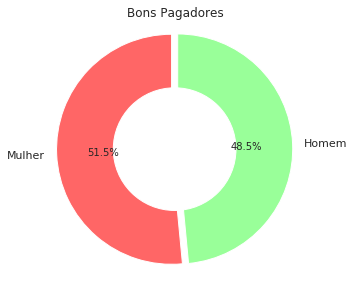

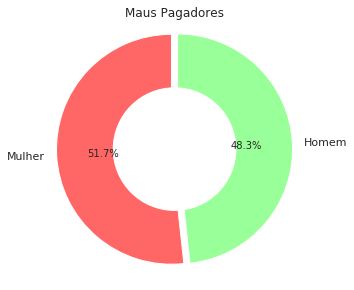

In [14]:
rcParams['figure.figsize'] = 4, 4

# Data to plot
labels = ['Mulher', 'Homem']
sizes = [c.values, d.values]
explode = (0.02,0.02)
colors = ['#ff6666', '#99ff99']

titles = ['Bons Pagadores', 'Maus Pagadores']
for i, title in enumerate(titles):
    # Plot
    plt.figure(0)
    plt.pie(sizes[i], labels=labels, colors=colors, radius=0.75,startangle=90,explode=explode,autopct='%1.1f%%')
    
    # Draw white circle in the middle
    centre_circle = plt.Circle((0,0),0.40,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Axis
    plt.axis('equal')
    plt.tight_layout()
    pylab.title(title)
    plt.show()



## Renda titular

In [15]:
tabelao.RENDA_TITULAR.describe()

count     96384.000000
mean       1683.176975
std        1400.902507
min         400.000000
25%        1060.000000
50%        1400.000000
75%        1940.000000
max      180000.000000
Name: RENDA_TITULAR, dtype: float64

In [16]:
base = 990.0

In [17]:
e = good.groupby('RENDA_TITULAR').size()
f = bad.groupby('RENDA_TITULAR').size()

In [18]:
good_wage = [e[(e.index > 0) & (e.index <= base)].sum(), 
        e[(e.index > base) & (e.index <= 2*base)].sum(), 
        e[(e.index > 2*base) & (e.index <= 3*base)].sum(),
        e[(e.index > 3*base) & (e.index <= 4*base)].sum(),
        e[(e.index > 4*base)].sum()]
good_wage

[4120, 9089, 3063, 985, 879]

In [19]:
bad_wage = [f[(f.index > 0) & (f.index <= base)].sum(), 
        f[(f.index > base) & (f.index <= 2*base)].sum(), 
        f[(f.index > 2*base) & (f.index <= 3*base)].sum(),
        f[(f.index > 3*base) & (f.index <= 4*base)].sum(),
        f[(f.index > 4*base)].sum()]
bad_wage

[14736, 44875, 12326, 3417, 2894]

In [20]:
gw = np.array(good_wage)
bw = np.array(bad_wage)
print('good:',gw/(gw.sum()),'\nbad:',bw/(bw.sum()))

good: [0.22717247 0.50115792 0.1688906  0.05431187 0.04846714] 
bad: [0.1883243  0.57349709 0.15752479 0.04366885 0.03698497]


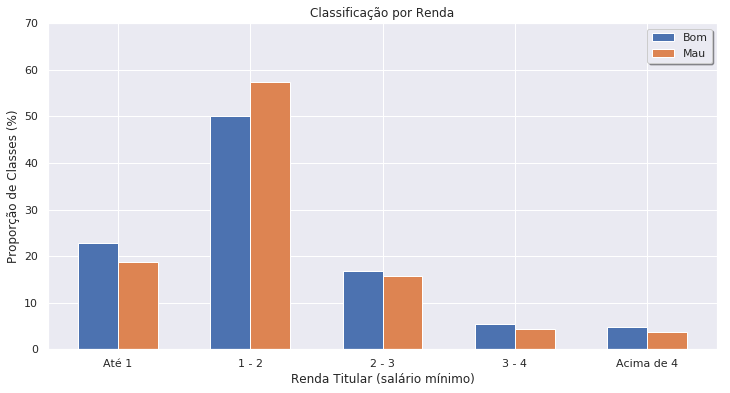

In [21]:
rcParams['figure.figsize'] = 12, 6
# set width of bar
barWidth = 0.3
x = ['Até 1', '1 - 2', '2 - 3', '3 - 4', 'Acima de 4']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(good_wage))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, gw/(gw.sum())*100, width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, bw/(bw.sum())*100, width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Renda Titular (salário mínimo)')
pylab.ylabel('Proporção de Classes (%)')
pylab.ylim((0, 70))
plt.title('Classificação por Renda')
plt.xticks(x_pos, x)
 
# Create legend & Show graphic
plt.legend(frameon=True, shadow=True)
plt.show()

In [22]:
print('all good:', len(good)/(len(bad)+len(good)),'\nall bad:',len(bad)/(len(bad)+len(good)))

all good: 0.18817304699657642 
all bad: 0.8118269530034236


## Estado civil

In [23]:
ec = tabelao.groupby('ESTADO_CIVIL').size()
ec

ESTADO_CIVIL
CA    25399
CO    10867
SE     5387
SO    49907
VI     4829
dtype: int64

In [24]:
print('Proporção natural da base:')
ec.values/ec.sum()

Proporção natural da base:


array([0.26350517, 0.11274108, 0.05588812, 0.51776655, 0.05009908])

In [25]:
g = good.groupby('ESTADO_CIVIL').size()
h = bad.groupby('ESTADO_CIVIL').size()

In [26]:
ec_good = (g/g.sum()).values

In [27]:
ec_bad = (h/h.sum()).values

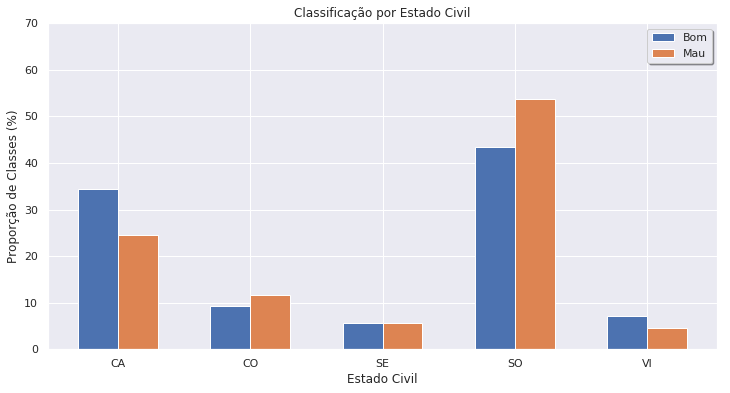

In [28]:
rcParams['figure.figsize'] = 12, 6
# set width of bar
barWidth = 0.3
x = ['CA', 'CO', 'SE', 'SO', 'VI']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(ec_good))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, ec_good*100, width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, ec_bad*100, width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Estado Civil')
pylab.ylabel('Proporção de Classes (%)')
pylab.ylim((0, 70))
plt.title('Classificação por Estado Civil')
plt.xticks(x_pos, x)

#Lines
# pylab.axhline(0.2518*100, color='black', linestyle='--', linewidth = 1)
# pylab.axhline(0.7481*100, color='black', linestyle='--', linewidth = 1)
 
# Create legend & Show graphic
plt.legend(frameon=True, shadow=True)
plt.show()

## Profissão

A categoria "Liberal" foi excluída da análise devido ao baixo número de instâncias.

In [29]:
cp = tabelao.groupby('CATEGORIAL_PROFISSAO').size()[:-1]
cp

CATEGORIAL_PROFISSAO
AGRICULTOR      3175
APOSENTADO     18916
ASSALARIADO    46081
AUT+NOMO       26255
dtype: int64

In [30]:
i = good.groupby('CATEGORIAL_PROFISSAO').size()[:-1]
j = bad.groupby('CATEGORIAL_PROFISSAO').size()[:-1]

In [31]:
cp_good = (i/i.sum()).values
cp_bad = (j/j.sum()).values

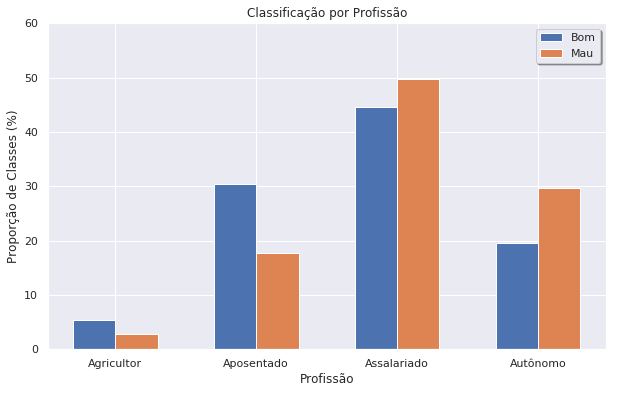

In [32]:
rcParams['figure.figsize'] = 10, 6
# set width of bar
barWidth = 0.3
x = ['Agricultor', 'Aposentado', 'Assalariado', 'Autônomo']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(cp_good))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, cp_good*100, width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, cp_bad*100, width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Profissão')
pylab.ylabel('Proporção de Classes (%)')
pylab.ylim((0, 60))
plt.title('Classificação por Profissão')
plt.xticks(x_pos, x)

#Lines
# pylab.axhline(0.2518*100, color='black', linestyle='--', linewidth = 1)
# pylab.axhline(0.7481*100, color='black', linestyle='--', linewidth = 1)
 
# Create legend & Show graphic
plt.legend(frameon=True, shadow=True)
plt.show()

## Tipo de Residência

As categorias "FA", "FI", "SM" foram excluídas da análise devido ao baixo número de instâncias.

In [33]:
tabelao.groupby('TIPO_RESIDENCIA').size()

TIPO_RESIDENCIA
AL     9565
FA     2346
FI     1936
OU    23485
PR    57952
SM      154
dtype: int64

In [34]:
k = good.groupby('TIPO_RESIDENCIA').size()[['AL','OU', 'PR']]
l = bad.groupby('TIPO_RESIDENCIA').size()[['AL','OU', 'PR']]

In [35]:
tr_good = (k/k.sum()).values
tr_bad = (l/l.sum()).values

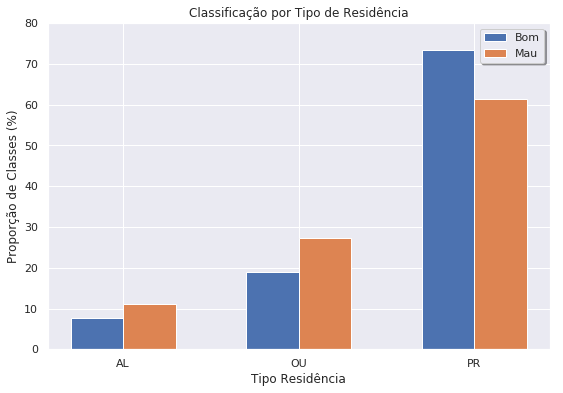

In [36]:
rcParams['figure.figsize'] = 9, 6
# set width of bar
barWidth = 0.3
x = ['AL', 'OU', 'PR']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(tr_good))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, tr_good*100, width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, tr_bad*100, width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Tipo Residência')
pylab.ylabel('Proporção de Classes (%)')
pylab.ylim((0, 80))

plt.title('Classificação por Tipo de Residência')
plt.xticks(x_pos, x)

#Lines
# pylab.axhline(0.2518*100, color='black', linestyle='--', linewidth = 1)
# pylab.axhline(0.7481*100, color='black', linestyle='--', linewidth = 1)
 
# Create legend & Show graphic
plt.legend(frameon=True, shadow=True)
plt.show()

## Quantidade de dependentes

In [37]:
tabelao.groupby('QTD_DEPENDENTES').size()

QTD_DEPENDENTES
0.0     73562
1.0     14513
2.0      6013
3.0      1674
4.0       425
5.0       119
6.0        37
7.0        14
8.0        19
9.0         4
10.0        9
dtype: int64

In [38]:
m = good.groupby('QTD_DEPENDENTES').size()
n = bad.groupby('QTD_DEPENDENTES').size()

In [39]:
qtd_good = np.array([m[m.index == 0].sum(), 
        m[m.index == 1].sum(), 
        m[m.index >= 2].sum()])
qtd_good

array([14497,  2437,  1203])

In [40]:
qtd_bad = np.array([n[n.index == 0].sum(), 
        n[n.index == 1].sum(), 
        n[n.index >= 2].sum()])
qtd_bad

array([59065, 12076,  7111])

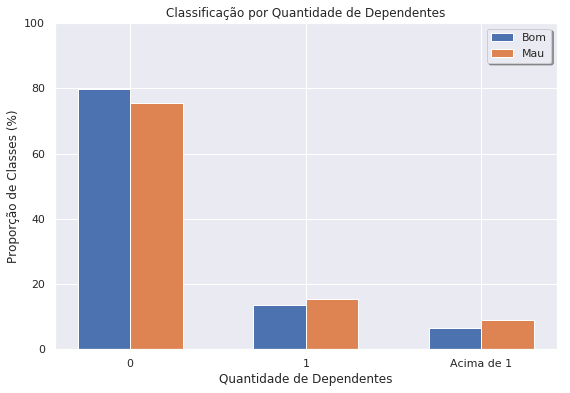

In [41]:
rcParams['figure.figsize'] = 9, 6
# set width of bar
barWidth = 0.3
x = ['0', '1', 'Acima de 1']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(qtd_good))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, 100*qtd_good/qtd_good.sum(), width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, 100*qtd_bad/qtd_bad.sum(), width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Quantidade de Dependentes')
pylab.ylabel('Proporção de Classes (%)')
pylab.ylim((0, 100))

plt.title('Classificação por Quantidade de Dependentes')
plt.xticks(x_pos, x)

#Lines
# pylab.axhline(0.2518*100, color='black', linestyle='--', linewidth = 1)
# pylab.axhline(0.7481*100, color='black', linestyle='--', linewidth = 1)
 
# Create legend & Show graphic
plt.legend(frameon=True, shadow=True)
plt.show()

## Correlação das Variáveis

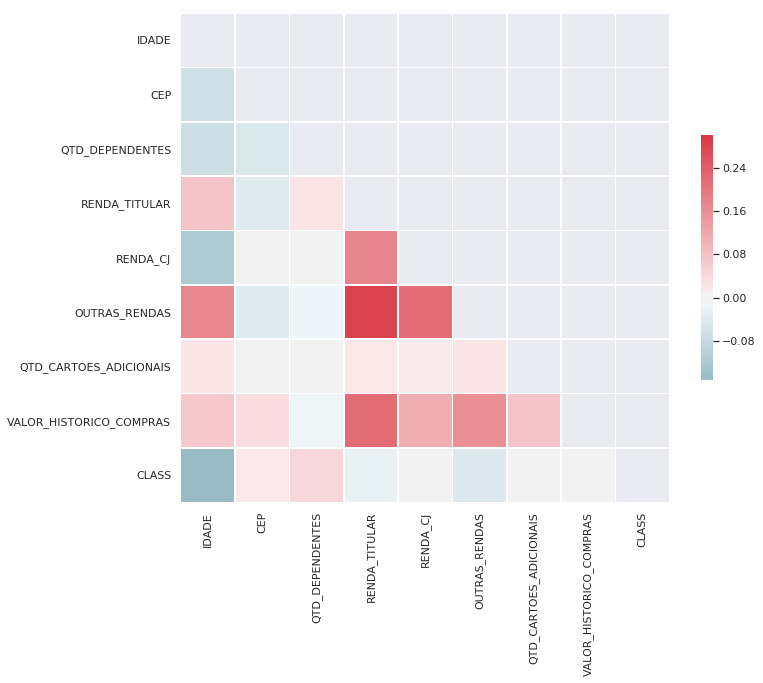

In [42]:
# Compute the correlation matrix
corr = tabelao.iloc[:,1:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})